# **Modelling and Evaluation Notebook**

## Objectives

* Fulfill Business Requirements 2 - predict if a cherry leaf is healthy or contains powdery mildew.

## Inputs

* inputs/cherry_leaves_dataset/cherry_leaves/train
* inputs/cherry_leaves_dataset/cherry_leaves/validation
* inputs/cherry_leaves_dataset/cherry_leaves/test

## Outputs

* Image Augmentation.
* Image distribution plot, train vs validation vs test.
* Machine learning model creation and training.
* Plotting model performance.
* Prediction of a selected image file.



---

# Set Working Directory

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/cherry-leaves-mildew-detection/jupyter_notebooks'

In [3]:
os.chdir("/workspace/cherry-leaves-mildew-detection")
print("You set a new current directory")

You set a new current directory


In [4]:
current_dir = os.getcwd()
current_dir

'/workspace/cherry-leaves-mildew-detection'

### Set Input Directories

In [5]:
data_dir = "inputs/cherry_leaves_dataset/cherry_leaves"
train_dir = data_dir + "/train"
val_dir = data_dir + "/validation"
test_dir = data_dir + "/test"

### Set Output Directory

In [6]:
version = "v2"
file_path = f"outputs/{version}"
if "outputs" in os.listdir(current_dir) and version in os.listdir(current_dir + "/outputs"):
    print("This directory exists, create a new version.")
else:
    os.makedirs(name=file_path)

### Set Label Names

In [7]:
labels = os.listdir(train_dir)
print("The image labels are", labels)

The image labels are ['healthy', 'powdery_mildew']


---

# Import Image Shape

In [8]:
import joblib

image_shape = joblib.load(filename=f"outputs/v1/image_shape_embed.pkl")
image_shape

(256, 256, 3)

---

# Label Frequency Per Set

### Image Distribution Per Label Per Set

/tmp/ipykernel_1266/3204433454.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_label_frequency = df_label_frequency.append(pd.Series(data={"Dataset": set,
/tmp/ipykernel_1266/3204433454.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_label_frequency = df_label_frequency.append(pd.Series(data={"Dataset": set,
/tmp/ipykernel_1266/3204433454.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_label_frequency = df_label_frequency.append(pd.Series(data={"Dataset": set,
/tmp/ipykernel_1266/3204433454.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_label_frequency = df_label_frequency.append(pd.Series(data={"Dataset

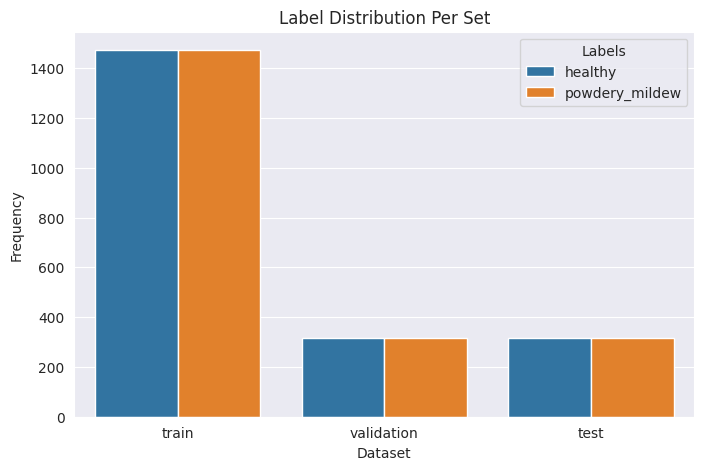

In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

df_label_frequency = pd.DataFrame([])
for set in ["train", "validation", "test"]:
    for label in labels:
        count = int(len(os.listdir(data_dir + "/" + set + "/" + label)))
        df_label_frequency = df_label_frequency.append(pd.Series(data={"Dataset": set, 
                                                                       "Labels": label,
                                                                       "Frequency": count}),
                                                        ignore_index=True)

sns.set_style("darkgrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_label_frequency, x="Dataset", y="Frequency", hue="Labels")
plt.title("Label Distribution Per Set")
if "label_distribution_graph.png" not in file_path:
    plt.savefig(f"{file_path}/label_distribution_graph.png")
else:
    plt.show()

The data is distrubted between the set in a 70:15:15 split. There are an equal number of healthy and powdery images so the dataset is balanced.

---

# Image Data Augmentation

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialising ImageDataGenerator
augmented_images = ImageDataGenerator(rotation_range=25,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      vertical_flip=True,
                                      fill_mode="nearest",
                                      rescale=1./255
                                      )

### Augment Training Data

In [13]:
# Set batch size the data will be looped over
batch_size = 20
# Augmented training data
train_set = augmented_images.flow_from_directory(train_dir,
                                                 target_size=image_shape[:2],
                                                 color_mode="rgb",
                                                 batch_size=batch_size,
                                                 class_mode="binary",
                                                 shuffle=True
                                                 )
train_set.class_indices

Found 2946 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Augment Validation Data

In [15]:
# Augmented (only rescale) validation data
val_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_dir,
                                               target_size=image_shape[:2],
                                               color_mode="rgb",
                                               batch_size=batch_size,
                                               class_mode="binary",
                                               shuffle=False)
val_set.class_indices   

Found 632 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Augment Test Data

In [16]:
# Augmented (only rescale) test data
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_dir,
                                               target_size=image_shape[:2],
                                               color_mode="rgb",
                                               batch_size=batch_size,
                                               class_mode="binary",
                                               shuffle=False)
test_set.class_indices      

Found 630 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Plot Augmented Data

Train Set
(20, 256, 256, 3)


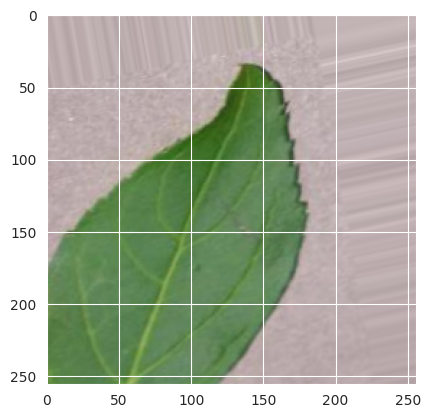

(20, 256, 256, 3)


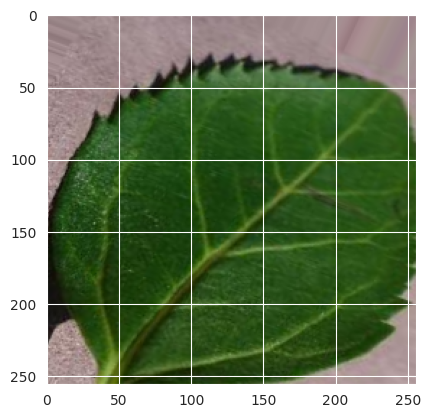

(20, 256, 256, 3)


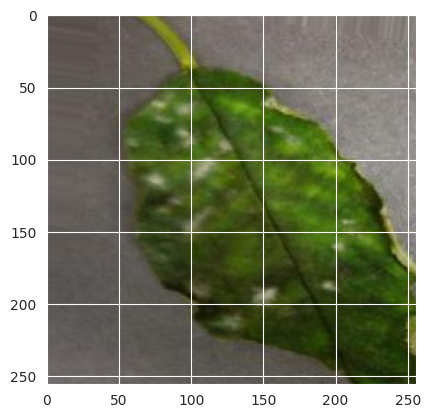

(20, 256, 256, 3)


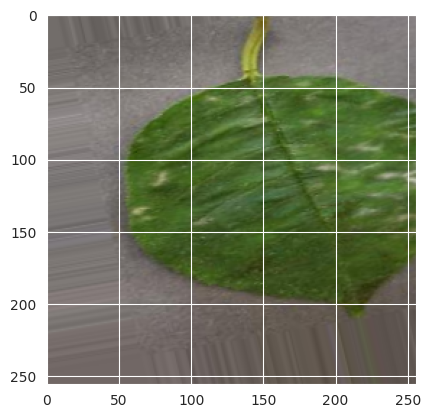

(20, 256, 256, 3)


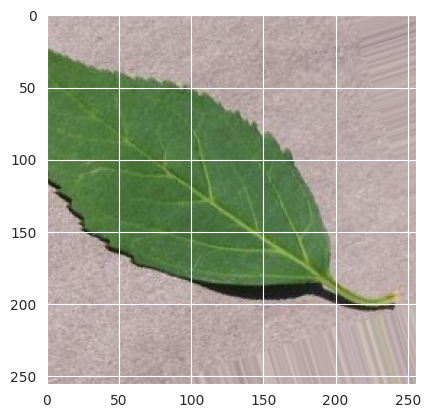

Validation Set
(20, 256, 256, 3)


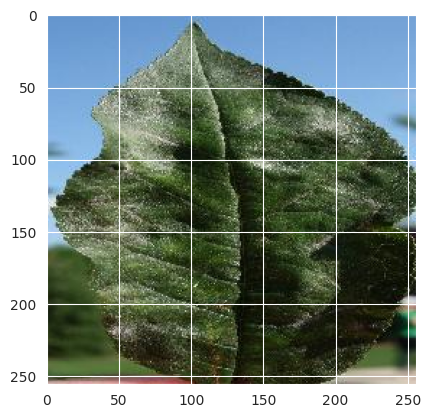

(20, 256, 256, 3)


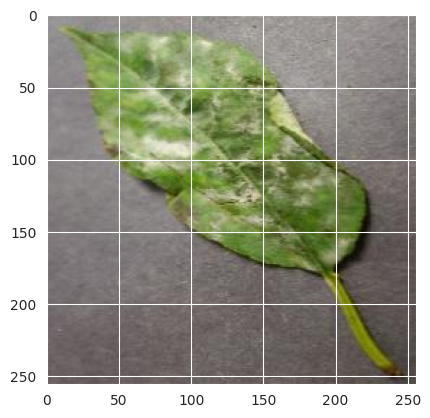

(20, 256, 256, 3)


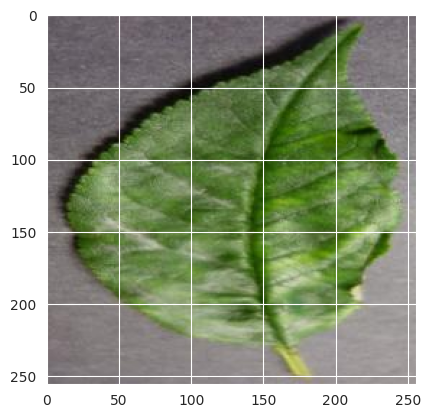

(20, 256, 256, 3)


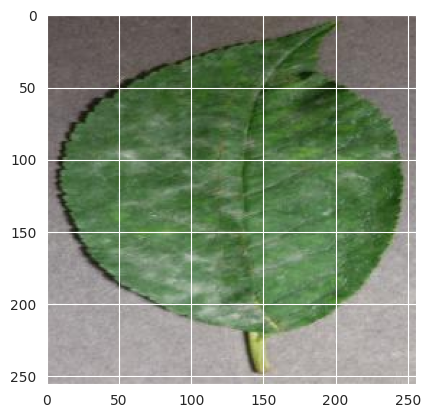

(20, 256, 256, 3)


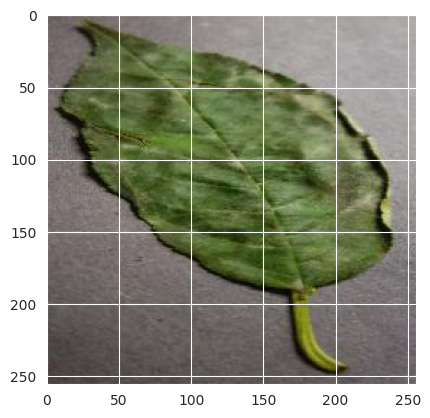

Test Set
(20, 256, 256, 3)


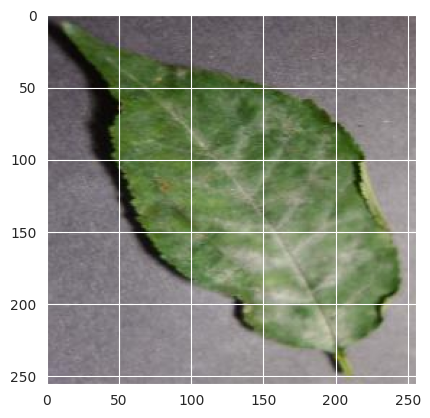

(20, 256, 256, 3)


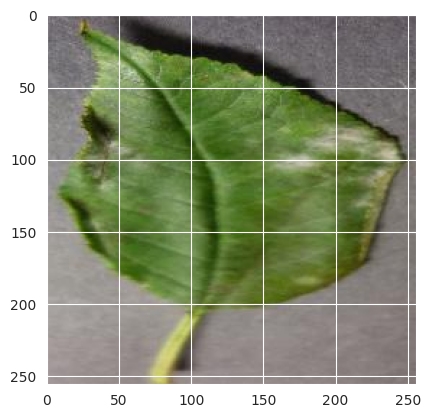

(20, 256, 256, 3)


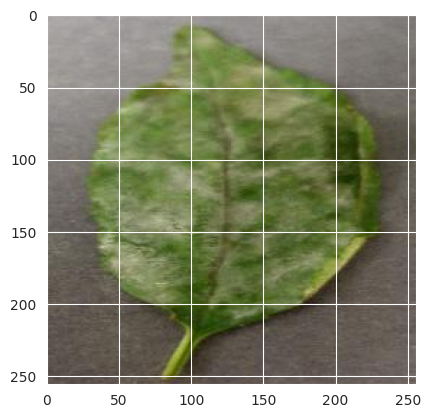

(20, 256, 256, 3)


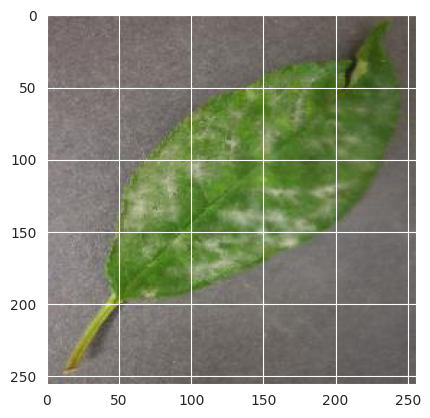

(20, 256, 256, 3)


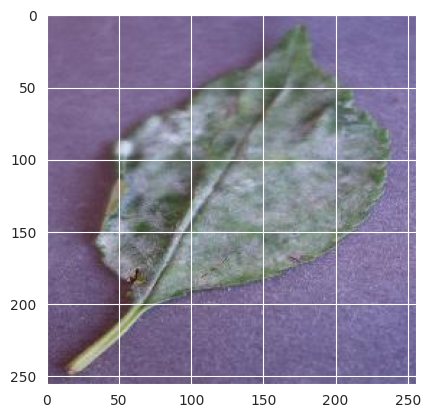

In [23]:
data_sets = {"Train": train_set, "Validation": val_set, "Test": test_set}
for set_name, set in data_sets.items():
    print(f"{set_name} Set")
    for _ in range(5):
        X, y = set.next()
        print(X.shape)
        plt.imshow(X[0])
        plt.show()

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* If you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
    # create here your folder
    # os.makedirs(name='')
except Exception as e:
    print(e)
